In [25]:
import pandas as pd

# COVID-19

### CSSE data

In [26]:
# Read
csse_ts = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [27]:
# Nvm these
csse_ts = csse_ts.drop(['Province/State','Lat','Long'], axis=1)

In [28]:
# Pivot and sort
csse_ts = csse_ts.pivot_table(index='Country/Region').rename_axis(None).sort_index().T

In [29]:
# Name rows
csse_ts.index.name = 'Date_Confirmed'

In [30]:
# set index
csse_ts.reset_index(inplace=True)

In [31]:
# Set date and sort
csse_ts = csse_ts.set_index(pd.DatetimeIndex(csse_ts['Date_Confirmed'])).sort_index()

In [32]:
# Resample for daily mean (if needed)
csse_ts = csse_ts.resample('1D').mean().round()

In [33]:
# Calculate delta (increase) of daily cases
csse_daily = csse_ts.diff().fillna(0).reset_index()

In [34]:
csse_daily

,Date_Confirmed,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2020-04-18,27.0,9.0,116.0,8.0,5.0,0.0,89.0,47.0,3.0,...,504.0,6.0,85.0,23.0,0.0,16.0,0.0,0.0,5.0,1.0
88,2020-04-19,63.0,14.0,95.0,9.0,0.0,0.0,81.0,43.0,0.0,...,533.0,9.0,75.0,29.0,0.0,19.0,0.0,0.0,4.0,0.0
89,2020-04-20,30.0,22.0,89.0,4.0,0.0,0.0,102.0,48.0,0.0,...,425.0,18.0,62.0,0.0,0.0,12.0,0.0,0.0,4.0,0.0
90,2020-04-21,66.0,25.0,93.0,0.0,0.0,0.0,90.0,62.0,0.0,...,393.0,0.0,51.0,29.0,0.0,17.0,0.0,0.0,5.0,3.0


### Export

In [35]:
csse_ts.to_csv('output_data/time_series/total-world-covid19.csv', index=True) # Total
csse_daily.to_csv('output_data/time_series/daily-world_covid19.csv', index=False) # Daily

### Plots

In [36]:
from numpy import *
import math
import matplotlib.pyplot as plt

#### Cumulative
Note exponential growth is expected and not really informative.

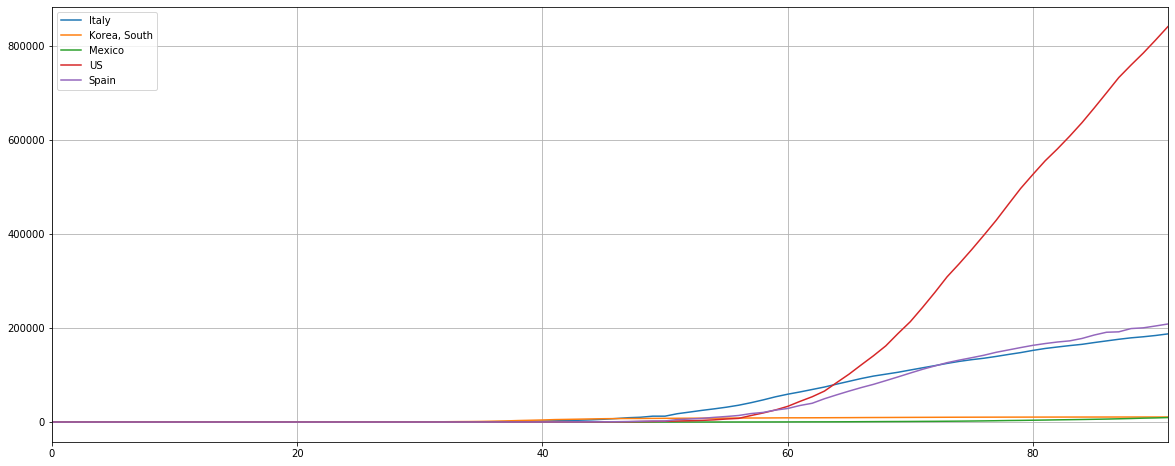

In [37]:
plt.figure(figsize=(20,8))

for state in ['Italy', 'Korea, South', 'Mexico', 'US', 'Spain']:
    csse_daily[state].fillna(0).cumsum().plot()

plt.legend()
plt.grid(True)
plt.show()

#### Growth rate (log scale)
**Notice there are no dates:** all we care is about the growth rate (so each region starts at day 0 from first case).

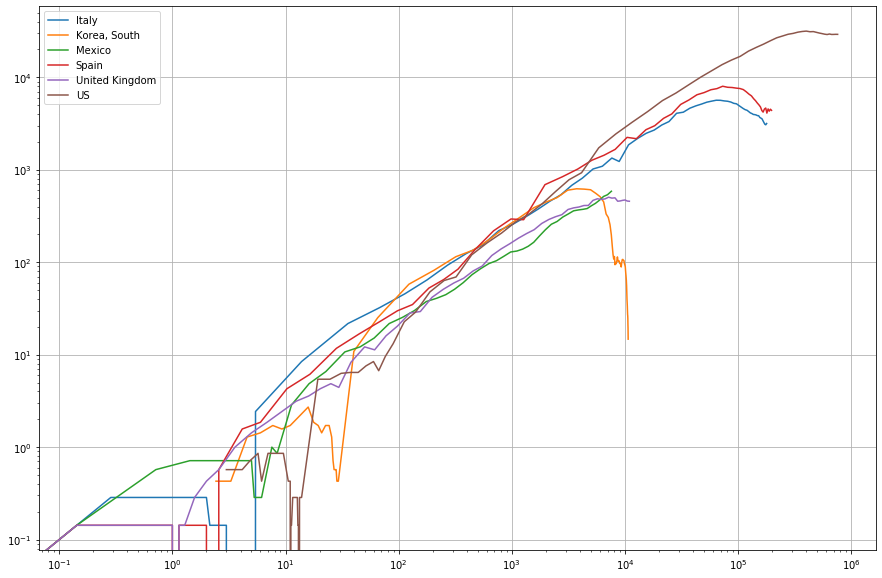

In [39]:
plt.figure(figsize=(15,10))

for state in ['Italy','Korea, South','Mexico','Spain','United Kingdom','US']:
    plt.plot(list(csse_ts[state].dropna().rolling(window=7).mean()), list(csse_daily[state].dropna().rolling(window=7).mean()), label=state)

plt.legend()
plt.grid(True)

plt.yscale('log')
plt.xscale('log')

plt.show()